# Data Science Practice Task 3

In [93]:
# print working directory
!pwd

# List files and folders
!ls

# Check the open jdk version on colab
!ls /usr/lib/jvm/

/content
Bike_Rental_data.csv	   spark-3.1.2-bin-hadoop3.2.tgz
DataScience.ipynb	   spark-3.1.2-bin-hadoop3.2.tgz.1
sample_data		   spark-3.1.2-bin-hadoop3.2.tgz.2
spark-3.1.2-bin-hadoop3.2
default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [94]:

# Download and install Java 8
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-driver

In [95]:

# Check if we have java 8 or not
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [96]:
# Download Apache Spark binary: This link can change based on the version. Update this link with the latest version before using
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz


# Unzip file
!tar -xvzf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [97]:
#Install findspark: Adds Pyspark to sys.path at runtime
!pip install -q findspark

# Install pyspark
!pip install pyspark

In [98]:
# Add environmental variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

# findspark will locate spark in the system
import findspark
findspark.init()

In [99]:

# 3. Start Spark Session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [100]:


#Create Dataframe
df = spark.createDataFrame([{"Spark on": "Jupyter"} for x in range(1000)])
df.show(5)

+--------+
|Spark on|
+--------+
| Jupyter|
| Jupyter|
| Jupyter|
| Jupyter|
| Jupyter|
+--------+
only showing top 5 rows



In [101]:
#imports
from pyspark import SQLContext
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType, BooleanType, DoubleType, FloatType, StringType
from pyspark.sql.functions import udf, lit, when

#new spark session
spark  = SparkSession.builder.master("ip").enableHiveSupport().getOrCreate()

#configuring spark session
spark.conf.set("spark.sql.crossJoin.enabled", "true")

#setting spark context
sc = spark.sparkContext


#creating spark sql context to help in loading file
sqlcontext=SQLContext(sc)
#importation of evaluators
from pyspark.ml.evaluation import RegressionEvaluator, ClusteringEvaluator


lr_model=LinearRegression(featuresCol='features',labelCol="cnt", regParam=0.3, elasticNetParam=0.8)
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="cnt",metricName="r2")

# Exploratory data analysis

###View of sample data

In [102]:
#loading day dataset and printing columns and rows
dataframe=sqlcontext.read.csv("Bike_Rental_data.csv",header=True, mode="DROPMALFORMED")
dataframe.show(10, truncate=False)

+-------+----------+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+
|instant|dteday    |season|yr |mnth|holiday|weekday|workingday|weathersit|temp    |atemp   |hum     |windspeed|casual|registered|cnt |
+-------+----------+------+---+----+-------+-------+----------+----------+--------+--------+--------+---------+------+----------+----+
|1      |2011-01-01|1     |0  |1   |0      |6      |0         |2         |0.344167|0.363625|0.805833|0.160446 |331   |654       |985 |
|2      |2011-01-02|1     |0  |1   |0      |0      |0         |2         |0.363478|0.353739|0.696087|0.248539 |131   |670       |801 |
|3      |2011-01-03|1     |0  |1   |0      |1      |1         |1         |0.196364|0.189405|0.437273|0.248309 |120   |1229      |1349|
|4      |2011-01-04|1     |0  |1   |0      |2      |1         |1         |0.2     |0.212122|0.590435|0.160296 |108   |1454      |1562|
|5      |2011-01-05|1     |0  |1   |0      |3      |1  

### Number of columns and rows

In [103]:
print("Number of colums in dataframe {}".format(len(dataframe.columns)))
print("Number of rows in dataframe {}".format(dataframe.count()))

Number of colums in dataframe 16
Number of rows in dataframe 731


In [104]:
# print Schema of the loaded dataframe
dataframe.printSchema()

root
 |-- instant: string (nullable = true)
 |-- dteday: string (nullable = true)
 |-- season: string (nullable = true)
 |-- yr: string (nullable = true)
 |-- mnth: string (nullable = true)
 |-- holiday: string (nullable = true)
 |-- weekday: string (nullable = true)
 |-- workingday: string (nullable = true)
 |-- weathersit: string (nullable = true)
 |-- temp: string (nullable = true)
 |-- atemp: string (nullable = true)
 |-- hum: string (nullable = true)
 |-- windspeed: string (nullable = true)
 |-- casual: string (nullable = true)
 |-- registered: string (nullable = true)
 |-- cnt: string (nullable = true)



# Summary

###Percentiles

In [105]:

dataframe.summary().show()

+-------+------------------+----------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+
|summary|           instant|    dteday|            season|                yr|             mnth|             holiday|          weekday|        workingday|        weathersit|               temp|              atemp|               hum|          windspeed|           casual|        registered|               cnt|
+-------+------------------+----------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+
|  count|               731|       731|               731|               731

###Statistics :Describe the dataframe min, max, count 

In [106]:
# To get the output, you have to run action commands (like show, collect, etc.)
dataframe.describe().show()

+-------+------------------+----------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+
|summary|           instant|    dteday|            season|                yr|             mnth|             holiday|          weekday|        workingday|        weathersit|               temp|              atemp|               hum|          windspeed|           casual|        registered|               cnt|
+-------+------------------+----------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-----------------+------------------+------------------+
|  count|               731|       731|               731|               731

In [107]:
dataframe.describe()

DataFrame[summary: string, instant: string, dteday: string, season: string, yr: string, mnth: string, holiday: string, weekday: string, workingday: string, weathersit: string, temp: string, atemp: string, hum: string, windspeed: string, casual: string, registered: string, cnt: string]

###What columns are we dealing with??

In [108]:
print(dataframe.columns)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


## Data Cleaning

###check and fix missing values

In [109]:
#Check Missing Value in Pyspark Dataframe
def count_nulls(dataframe):
    """Input pyspark dataframe and return list of columns with missing value and it's total value"""
    null_counts = []          #make an empty list to hold our results
    for col in dataframe.dtypes:     #iterate through the column data types we saw above, e.g. ('C0', 'bigint')
        cname = col[0]        #splits out the column name, e.g. 'C0'    
        ctype = col[1]        #splits out the column type, e.g. 'bigint'
        nulls = dataframe.where( dataframe[cname].isNull() ).count() #check count of null in column name
        result = tuple([cname, nulls])  #new tuple, (column name, null count)
        null_counts.append(result)      #put the new tuple in our result list
    null_counts=[(x,y) for (x,y) in null_counts if y!=0]  #view just columns that have missing values
    return null_counts



In [110]:
#call function check missing values
null_counts = count_nulls(dataframe)
null_counts

[]

No missing values in our case.



converting columns of day dataframe into correct data types

In [111]:
#converting columns of day dataframe into correct data types
dataframe = dataframe.withColumn("instant", dataframe["instant"].cast(IntegerType()))
dataframe = dataframe.withColumn("season", dataframe["season"].cast(IntegerType()))
dataframe = dataframe.withColumn("yr", dataframe["yr"].cast(IntegerType()))
dataframe = dataframe.withColumn("mnth", dataframe["mnth"].cast(IntegerType()))
dataframe = dataframe.withColumn("holiday", dataframe["holiday"].cast(BooleanType()))
dataframe = dataframe.withColumn("weekday", dataframe["weekday"].cast(IntegerType()))
dataframe = dataframe.withColumn("workingday", dataframe["workingday"].cast(BooleanType()))
dataframe = dataframe.withColumn("weathersit", dataframe["weathersit"].cast(IntegerType()))
dataframe = dataframe.withColumn("temp", dataframe["temp"].cast("double"))
dataframe = dataframe.withColumn("atemp", dataframe["atemp"].cast(FloatType()))
dataframe = dataframe.withColumn("hum", dataframe["hum"].cast(DoubleType()))
dataframe = dataframe.withColumn("windspeed", dataframe["windspeed"].cast(DoubleType()))
dataframe = dataframe.withColumn("cnt", dataframe["cnt"].cast(IntegerType()))

#adding item column and since all items are bikes the item is represented by 1
item=1;
dataframe = dataframe.withColumn("item", lit(item))

#adding column myclass:
#   0-3000 means disaster and is represented by 0.0
#   2001-7000 means the day is normal and is represented by 1.0
#   above 7000 means there is an event in the day and is represented by 2.0
dataframe = dataframe.withColumn("myclass", lit(when(dataframe["cnt"]<=3000, "0.0").when(dataframe["cnt"]<=8000, "1.0").otherwise("2.0")))

#splitting day dataframe into test data and train data
train_dataframe, test_dataframe = dataframe.randomSplit([0.75,0.25],seed=100)


### Data summary visualization

In [112]:
#importing Pandas  for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
dataframe.dtypes

[('instant', 'int'),
 ('dteday', 'string'),
 ('season', 'int'),
 ('yr', 'int'),
 ('mnth', 'int'),
 ('holiday', 'boolean'),
 ('weekday', 'int'),
 ('workingday', 'boolean'),
 ('weathersit', 'int'),
 ('temp', 'double'),
 ('atemp', 'float'),
 ('hum', 'double'),
 ('windspeed', 'double'),
 ('casual', 'string'),
 ('registered', 'string'),
 ('cnt', 'int'),
 ('item', 'int'),
 ('myclass', 'string')]

In [114]:
dfpandas=dataframe.toPandas()

Correlation of variables

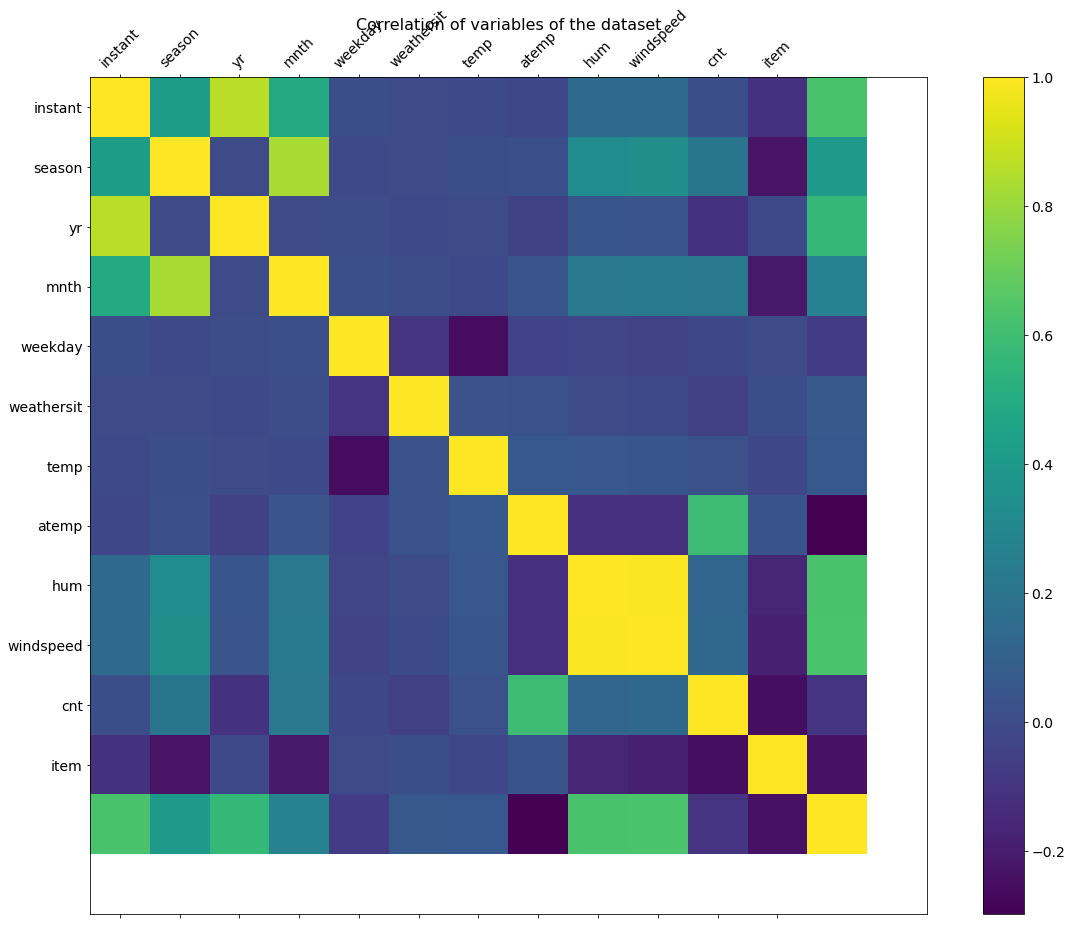

In [115]:
f = plt.figure(figsize=(20, 15))
plt.matshow(dfpandas.corr(), fignum=f.number)
plt.xticks(range(dfpandas.select_dtypes(['number']).shape[1]), dfpandas.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfpandas.select_dtypes(['number']).shape[1]), dfpandas.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation of variables of the dataset', fontsize=16);

###Visualizing how different users rent bikes

In [116]:
# function to plot data takes my_objs(array of objects), title (title of line graph)
# each object in the array must have the folowing attributes: color, label, data(array of data points)
def plot_data(my_objs, title="Line graph"):
    #preparing the drawing workspace
    plt.title(title)   
    plt.ylabel("Number of bikes")
    plt.xlabel("Test data index")

    #looping through input objects to plot the data points
    for obj in my_objs:
        #creating instance array of data points
        x_ind = np.arange(0, len(obj.get("data")))
        #plotting
        plt.plot(x_ind, obj.get("data"), color=obj.get("color"), label=obj.get("label"))
    
    #setting possition of graph legend
    plt.legend(loc='upper right')
    #displaying of the graph
    plt.show()
  

Dataset summary of columns


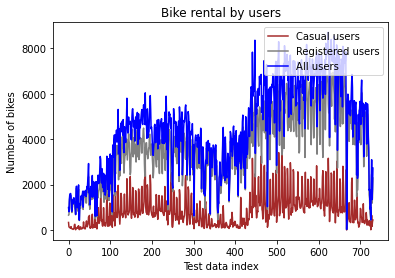

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aaa767210>]],
      dtype=object)

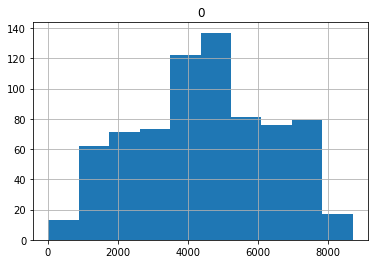

In [117]:
#creating plotting array to store plotting objects
my_objs=[]

#creating object for casual users and adding it to plotting array
my_arr=[int(row.casual) for row in dataframe.collect()]
obj={"data": my_arr, "color":"brown", "label":"Casual users"}
my_objs.append(obj)
dataframe.collect()
#creating object for registered users and adding it to plotting array
my_arr=[int(row.registered) for row in dataframe.collect()]
obj={"data": my_arr, "color":"gray", "label":"Registered users"}
my_objs.append(obj)

#creating object for all users and adding it to plotting array
my_arr=[int(row.cnt) for row in dataframe.collect()]
obj={"data": my_arr, "color":"blue", "label":"All users"}
my_objs.append(obj)


print("Dataset summary of columns")
#plot data from plotting array
plot_data(my_objs, "Bike rental by users")

#show histogram number of rented bikes for all users.
df=pd.DataFrame(my_arr)
df.hist()

####converting pandas dataframe back to pyspark


In [118]:
dataframe=spark.createDataFrame(dfpandas) 

# Recommendation engine
### Test and train data vector creation

In [119]:
#creating features column
vectorAssembler=VectorAssembler(inputCols=["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"],outputCol="features")
vector_train_df=vectorAssembler.transform(train_dataframe)
vector_train_df_org=vectorAssembler.transform(train_dataframe)
vector_test_df=vectorAssembler.transform(test_dataframe)



### Alternative least squares algorithm

In [120]:

#importing the module where als model is
from pyspark.ml.recommendation import ALS

#initializint the model
als=ALS(userCol="weekday", ratingCol="cnt",coldStartStrategy="drop")

#training the model
als_model=als.fit(vector_train_df_org)

#generating predictions for evaluation
predictions=als_model.transform(vector_test_df)
# v_train_day_df_org.printSchema()

#showing top 4 recomendations for high numbers of bike renting
weekDayRecs = als_model.recommendForAllUsers(4)

#evaluating the predictions
evaluator = RegressionEvaluator(metricName="mse", labelCol="cnt",
                                predictionCol="prediction")
mse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(metricName="rmse", labelCol="cnt",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

print("ALS Mean Square error = " + str(mse))
print("ALS Root Mean Square error = " + str(rmse))



# printing the recomendations
weekDayRecs.collect()

ALS Mean Square error = 3892406.148469092
ALS Root Mean Square error = 1972.9181808856372


[Row(weekday=1, recommendations=[Row(item=1, rating=4359.08349609375)]),
 Row(weekday=6, recommendations=[Row(item=1, rating=4488.31640625)]),
 Row(weekday=3, recommendations=[Row(item=1, rating=4451.16650390625)]),
 Row(weekday=5, recommendations=[Row(item=1, rating=4711.58740234375)]),
 Row(weekday=4, recommendations=[Row(item=1, rating=4485.607421875)]),
 Row(weekday=2, recommendations=[Row(item=1, rating=4698.41552734375)]),
 Row(weekday=0, recommendations=[Row(item=1, rating=4338.98681640625)])]

# Logistic regression

In [121]:
#logistic regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np

#initialize the model
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol="cnt")

#fit the model
lrModel = lr_model.fit(vector_train_df_org)

#generating predictions for testing model
pred=lrModel.transform(vector_test_df)

pred.select("cnt","prediction").show(50)


+----+------------------+
| cnt|        prediction|
+----+------------------+
|1562|1711.8895564746451|
|1263| 945.9864008625011|
|1162| 1219.493198663657|
|1248|1552.5645642041707|
|1543| 1369.050508031299|
| 506|1.9522074993340084|
|1096|1738.8997981462855|
|1708|1418.9157980495738|
|1005| 1152.563254736344|
|1712| 2213.271508521864|
|1530|1276.2018859827733|
|1538|1481.9657191767815|
|1746| 2060.877790775061|
|2927|3425.9944198975936|
|1450|1492.2877591975266|
|1446|1534.0394465886743|
|1851|1900.0027367141597|
|1872|1440.3901949847702|
|2133|2394.7065391955066|
|1977|1594.1586787443825|
|2046|2395.7473665876255|
|2471| 2103.636713842112|
|1693|1554.9990830000413|
|1471|2011.0530499331148|
|2895| 2283.973915617369|
|3267| 3832.969625990116|
|3204|3022.6939277204747|
|4189| 3395.725757282845|
|3351|  2557.89042343503|
|4451|3101.6185452928876|
|4433|3374.7899731325388|
|4105|3027.6174372137134|
|3409|3116.0925914138334|
|3855|3024.4394068994507|
|4679| 4549.993313578918|
|4758| 4366.

### Model evaluation

In [122]:
#evaluating the predictions of the model
evaluator = RegressionEvaluator(metricName="mse", labelCol="cnt", predictionCol="prediction")
mse = evaluator.evaluate(pred)

evaluator = RegressionEvaluator(metricName="rmse", labelCol="cnt", predictionCol="prediction")
rmse = evaluator.evaluate(pred)

#printing out evaluations of the model
print("Logistic regression Mean square error = " + str(mse))
print("Logistic regression Root Mean square error = " + str(rmse))

Logistic regression Mean square error = 871167.6266291741
Logistic regression Root Mean square error = 933.3636090126795


###Evaluation of predictions

In [123]:
#Evaluate the predictions
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="cnt", metricName="r2")
evaluator.evaluate(pred)

0.7753158741646912

The model is 77% accurate, thats good, but it can be improved by use of more data to improve the accuracy.

Converting ipynb file to html

In [125]:
!jupyter nbconvert --to HTML DataScience.ipynb

[NbConvertApp] Converting notebook DataScience.ipynb to HTML
[NbConvertApp] Writing 585626 bytes to DataScience.html


COnverting ipynb file to pdf

In [126]:
#installing pdf dependancy packages
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum ri
  ruby-dev bu

In [127]:
#converting to pdf
!jupyter nbconvert --to PDF DataScience.ipynb

[NbConvertApp] Converting notebook DataScience.ipynb to PDF
[NbConvertApp] Support files will be in DataScience_files/
[NbConvertApp] Making directory ./DataScience_files
[NbConvertApp] Making directory ./DataScience_files
[NbConvertApp] Making directory ./DataScience_files
[NbConvertApp] Writing 193177 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 173269 bytes to DataScience.pdf
